<a href="https://colab.research.google.com/github/YonatanEisenstein/Video-Games/blob/main/Video_Games_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Games Analysis

# Introduction

In this project I will analyze datset with some features regarding video games. I will identify patterns that determine whether a game succeeds or not. This should allow to spot potential big winners and plan advertising campaigns. The range of years of the data is 1980 - 2016, But this analysis could easily be implement to data from 2021 or 2026.

# DataSet Description

— Name

— Platform

— Year_of_Release

— Genre

— NA_sales (North American sales in USD million)

— EU_sales (sales in Europe in USD million)

— JP_sales (sales in Japan in USD million)

— Other_sales (sales in other countries in USD million)

— Critic_Score (maximum of 100)

— User_Score (maximum of 10)

— Rating (ESRB)

# Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
from IPython.display import display

In [2]:
try:
  games = pd.read_csv('games.csv')
except:
  games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Data Preproccessing

## Initial preprocessing

In [3]:
# Clean column names and convert them to lower case
games.columns = games.columns.str.strip().str.lower()

In [4]:
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [5]:
games.shape 

(16715, 11)

In [6]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


One question rises: Why 'user score' not apear in this metrix?

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Well, this is because its dtype is object. I will convert it to int and multiply it by 10 in order to set same scale as of criric_score. critic_score will be coverted to int too .There is no floats in this columns.

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [9]:
games['user_score'] = games['user_score'] * 10

In [10]:
games['user_score'] = games['user_score'].astype('Int8')
games['critic_score'] = games['critic_score'].astype('Int8')

In [11]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,71.250461
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,15.000061
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,64.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,75.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,82.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000


In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int8   
 9   user_score       7590 non-null   Int8   
 10  rating           9949 non-null   object 
dtypes: Int8(2), float64(5), object(4)
memory usage: 1.2+ MB


Well, now I will check how many differnt values there is in each column

In [13]:
games.nunique()

name               11559
platform              31
year_of_release       37
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            95
rating                 8
dtype: int64

Seems like there is a games that repeat in several rows. Is there duplicates?

In [14]:
games.duplicated().sum()

0

Ok, so maybe there is some games that could be played on several platforms

In [15]:
games['name'].value_counts().head(10)

Need for Speed: Most Wanted                12
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Madden NFL 07                               9
Madden NFL 08                               8
Cars                                        8
Lego Batman 3: Beyond Gotham                8
LEGO Jurassic World                         8
LEGO Star Wars II: The Original Trilogy     8
Name: name, dtype: int64

In [16]:
games[games['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82,91,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,<NA>,<NA>,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83,85,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83,85,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83,88,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,<NA>,<NA>,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80,91,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82,85,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,<NA>,<NA>,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45,61,E


Yes there is. I will check this games later. Now I will move to check null values.

## Handle missing values

In [17]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

As we can see, there is null values in 5 columns. First thing to note is that There is 2 null values in name column. Let us check these rows.

In [18]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,<NA>,<NA>,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,<NA>,<NA>,NaN


In this 2 rows there is no name, no genre and no scores. How these rows enterd the dataset? This rows would not help us in any way, so I will drop them. 

In [19]:
games = games[games['name'].notna()]

In [20]:
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Ok, for now I will go to examine the rest of the cols that contain null values. Its clear what is year and score, but what contained in the rates column?

In [21]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

well, according to wikipedia, it says the follows:

1. EC - Early Childhood
2. E – Everyone
3. E10+ – Everyone 10 and Older
4. T – Teen
5. M – Mature
6. Ao – Adults only
7. RP – Rating Pending
8. K-A – Kids to Adults

Namely, it catgorize the games by its target group.


The question that raise now is how should I fill the missing values in rating and scoring columns. Why these values are missed? In some cases maybe the scoring not given yet, but it could not be the case in all of the games since there is some very old games that have no rate or score. In other cases the user maybe skip the scoring stage, but the critic and ESRB should not skip the scoring or rating. So rating I will fill with 'no_rating'.

Since the amount of missing values in user_score and critic_score is around 50 percent I could not fill with the mean or median since it corrupt the data alltogether. In addition, every game have its own properties and qualities, so that I can not fill scoring of one game, based on this of the others. Maybe I can fill by the type of platform? 
We have to check if there is scoring rates that belongs in average to some platforms and not to the others. 


In [22]:
games.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
3DS,68.316092
DC,85.285714
DS,70.251938
GBA,76.768627
GC,75.975410
PC,70.624675
PS,78.654321
PS2,76.268332
PS3,67.265678


In [23]:
games['rating'] = games['rating'].fillna('no_rating')
games['rating'].isnull().sum()

0

In regard with scorings, Its not seem reasonable to fill based on platform since there is no some range of scoring that belong to one kind of platforms and not to the others. I will leave in this 2 columns the null values in place.

Well, what in regard with year? first I will create new table with all of the nulls

In [24]:
year_is_null = games[games['year_of_release'].isnull()]
year_is_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,85,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,64,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,79,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,no_rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,no_rating


Ehm... In some cases the year included in the name of the game!! So actually we can take the year from there.

In [25]:
# Split the name into tokens.

import nltk
nltk.download('punkt')

# function to split row into its components

def to_words(row):
    words = nltk.word_tokenize(row)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
year_is_null['name_words'] = year_is_null['name'].apply(to_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
year_is_null = year_is_null.reset_index()
year_is_null.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_words
0,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,85,E,"[Madden, NFL, 2004]"
1,377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,64,E,"[FIFA, Soccer, 2004]"
2,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,79,E10+,"[LEGO, Batman, :, The, Videogame]"
3,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,no_rating,"[wwe, Smackdown, vs, ., Raw, 2006]"
4,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,no_rating,"[Space, Invaders]"


In [28]:
# this code checks if name_words column contain a year and if so it insert the year to the 'year_of_release' column
for i in range(len(year_is_null)):
    
    for year in range(1970,2017):
    
      if str(year) in year_is_null.loc[i, 'name_words']:
      
        year_is_null.loc[i, 'year_of_release'] = year


In [29]:
year_is_null.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_words
0,183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94,85,E,"[Madden, NFL, 2004]"
1,377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84,64,E,"[FIFA, Soccer, 2004]"
2,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,79,E10+,"[LEGO, Batman, :, The, Videogame]"
3,475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,no_rating,"[wwe, Smackdown, vs, ., Raw, 2006]"
4,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,no_rating,"[Space, Invaders]"


In [30]:
year_is_null['year_of_release'].isnull().sum()

252

So this process helps to fill only 17 values. How should the rest be filled? one option is to use the platform feature to determine the year of release. This notion based on the assumption that each platform being in used in different range of years. We can check this assumption.

In [31]:
platform_year_mean = games.pivot_table(index=['platform'], values='year_of_release', aggfunc='mean').head(30)
platform_year_mean.head()

,year_of_release
platform,
2600,1982.137931
3DO,1994.666667
3DS,2013.126953
DC,1999.942308
DS,2008.185290


In [32]:
games[games['platform'] == '3DO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12663,Policenauts,3DO,1995.0,Adventure,0.0,0.0,0.06,0.0,<NA>,<NA>,no_rating
15076,Bust-A-Move,3DO,1994.0,Puzzle,0.0,0.0,0.02,0.0,<NA>,<NA>,no_rating
15560,Sotsugyou II: Neo Generation Special,3DO,1995.0,Simulation,0.0,0.0,0.02,0.0,<NA>,<NA>,no_rating


Yes, the assumption seems right. The 3D0 platform was used in the years 1994-5. So we can fill the missing years by type of platform 

In [33]:
for i in range(len(year_is_null)):
    platform = year_is_null.loc[i, "platform"]
    if(np.isnan(year_is_null.loc[i, "year_of_release"])):
        year_is_null.loc[i, "year_of_release"] = platform_year_mean['year_of_release'][platform]

In [34]:
year_is_null.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_words
0,183,Madden NFL 2004,PS2,2004.000000,Sports,4.26,0.26,0.01,0.71,94,85,E,"[Madden, NFL, 2004]"
1,377,FIFA Soccer 2004,PS2,2004.000000,Sports,0.59,2.36,0.04,0.51,84,64,E,"[FIFA, Soccer, 2004]"
2,456,LEGO Batman: The Videogame,Wii,2008.966563,Action,1.80,0.97,0.00,0.29,74,79,E10+,"[LEGO, Batman, :, The, Videogame]"
3,475,wwe Smackdown vs. Raw 2006,PS2,2006.000000,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,no_rating,"[wwe, Smackdown, vs, ., Raw, 2006]"
4,609,Space Invaders,2600,1982.137931,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,no_rating,"[Space, Invaders]"


In [35]:
year_is_null = year_is_null.set_index('index')

In [36]:
games['year_of_release'] = games['year_of_release'].fillna(year_is_null['year_of_release'])

In [37]:
games['year_of_release'].isnull().sum()

0

In [38]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,no_rating


And now I can convert the dtype of year_of_release to int

In [39]:
games['year_of_release'] = games['year_of_release'].apply(int)

In [40]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,no_rating


In [41]:
games['year_of_release'].dtype

dtype('int64')

In [42]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

## Calculate total_sales

Another thing to do is to calculate the total revenues from all of the regions.

In [43]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [44]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,<NA>,no_rating,31.38


Thats it with preprocessing. Now is data analyzing turn!

# Analyzing the Data

First thing to check is how many games released in each year in the dataset

In [45]:
sns.set_theme(style="darkgrid")

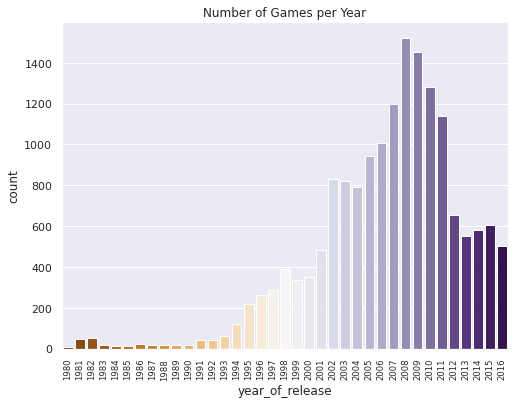

In [46]:
ax = plt.figure(figsize=(8,6))
ax = sns.countplot(x="year_of_release", data=games, palette='PuOr')
plt.title('Number of Games per Year')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

Till 1994 the number of games per year is less than 100, then it decrease till 2008, and decrease till 2016. For sure the data till 1994 is sparse and conclusions from that data should be derived carefully.

Another important measure is total_sales per year

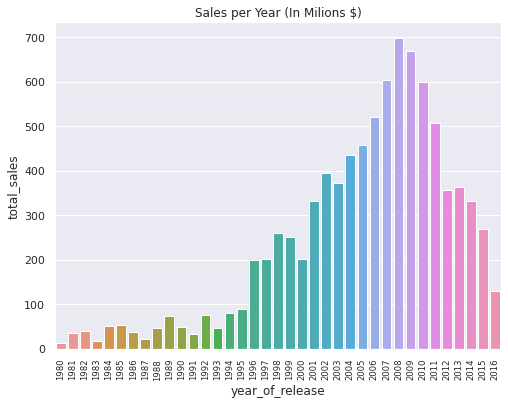

In [47]:
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="year_of_release",
                 y='total_sales',
                 data=games,
                 estimator=sum,
                 ci=None)
plt.title('Sales per Year (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

Is it reasonable that sales from video games in general shrinking after 2007? no. It seems that the data do not realy represent the sales in video games market. It focuses on narrow field of games.

## Platforms Analysis

Another count plot to draw is sales per platform

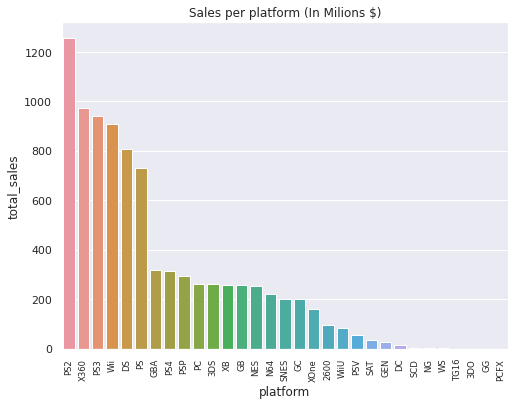

In [48]:
# determine descending order
order = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

# Draw bar plot
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="platform",
                 y='total_sales',
                 data=games,
                 estimator=sum,
                 order=order,
                 ci=None)
plt.title('Sales per platform (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

As can be seen the platform with the highesr amount of sales is PS2, withe more than 1.2 billion dollars. I will analyze this platform now.

In [49]:
ps2 = games[games['platform'] == 'PS2']
len(ps2)

2161

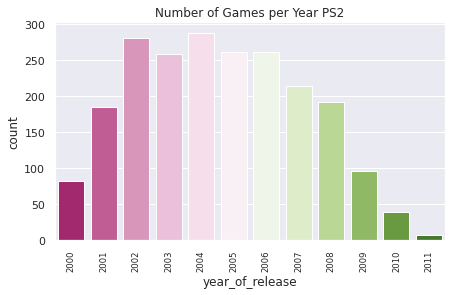

In [50]:
ax = plt.figure(figsize=(7,4))
ax = sns.countplot(x="year_of_release", data=ps2, palette='PiYG')
plt.title('Number of Games per Year PS2')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

First thing to note is that PS2 platform borned in 2000 and died in 2012 - It was not in use before and after this range. The popularity of this platform pick was in 2004 and more general - between 2002 and 2006. what about sales?

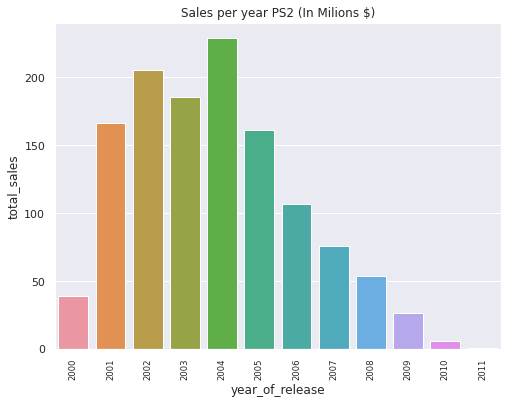

In [51]:
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="year_of_release",
                 y='total_sales',
                 data=ps2,
                 estimator=sum,
                 ci=None)
plt.title('Sales per year PS2 (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

In regard with sales, the pick was in 2004 and then a steep descent began. Interesting to note: In the years 2005-2006 the same amount of games released as in 2004, *even though* the sales decreased. It seems that games manufacturer do not notice the begining of descent trend and continue to produce games as before. We have to reccomend the product manager to stop producing games if sales begin to decrease after 4-5 years from the lunch of a platform. lets have a look to another platforms

In [52]:
wii = games[games['platform'] == 'Wii']
len(wii)

1320

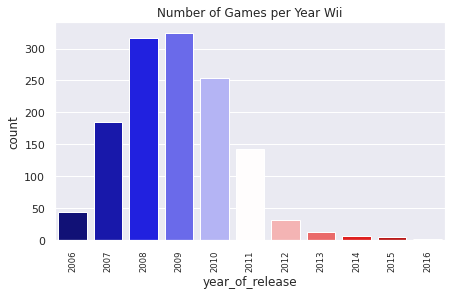

In [53]:
ax = plt.figure(figsize=(7,4))
ax = sns.countplot(x="year_of_release", data=wii, palette='seismic')
plt.title('Number of Games per Year Wii')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

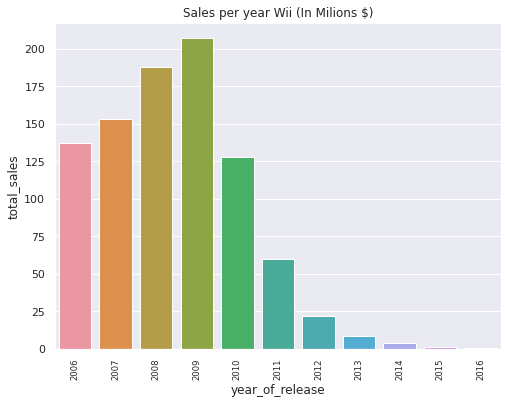

In [54]:
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="year_of_release",
                 y='total_sales',
                 data=wii,
                 estimator=sum,
                 ci=None)
plt.title('Sales per year Wii (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

Well, same trends we see in Wii platform. Life long is approx 10 years. Pick of sales is 3-4 after platform launching, and then decreasing start. Very important to pass these insights to the managers.

From the previous analysis we can conclude that in order to make a prognosis to the next year, we do not have to look more than 5-6 years ago. To achieve more confindece, lets look at the last 8 years. 

In [55]:
platform_lunch_year = games.groupby('platform')['year_of_release'].min()
platform_lunch_year[platform_lunch_year > 2007]

platform
3DS     2011
PS4     2013
PSV     2011
WiiU    2012
XOne    2013
Name: year_of_release, dtype: int64

In [56]:
games5 = games[games['platform'].isin(['3DS', 'PS4', 'PSV', 'WiiU', 'XOne'])]

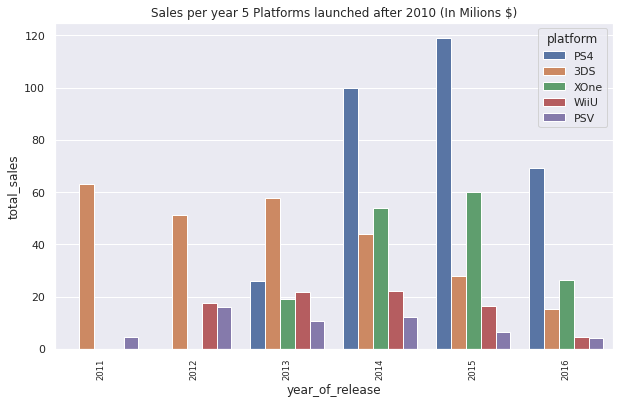

In [57]:
ax = plt.figure(figsize=(10,6))
ax = sns.barplot(x="year_of_release",
                 y='total_sales',
                 data=games5,
                 hue= 'platform',
                 estimator=sum,
                 ci=None)
plt.title('Sales per year 5 Platforms launched after 2010 (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

In the graph above each bin represent another plattform. As we can see, there is no platform that growth toward the year 2017. It is not surprising at all since, as I noted before, the overall sales shrinks from 2007 upward. However the platform with the bigest amount of sales is PS4, maybe the managers have to invest in developing games for this platform even though sales shrinked in the last year. 

But what we can see if we draw a boxplot graphs for each of the platforms, and see the distribution of sales per game? That is what i will try now:

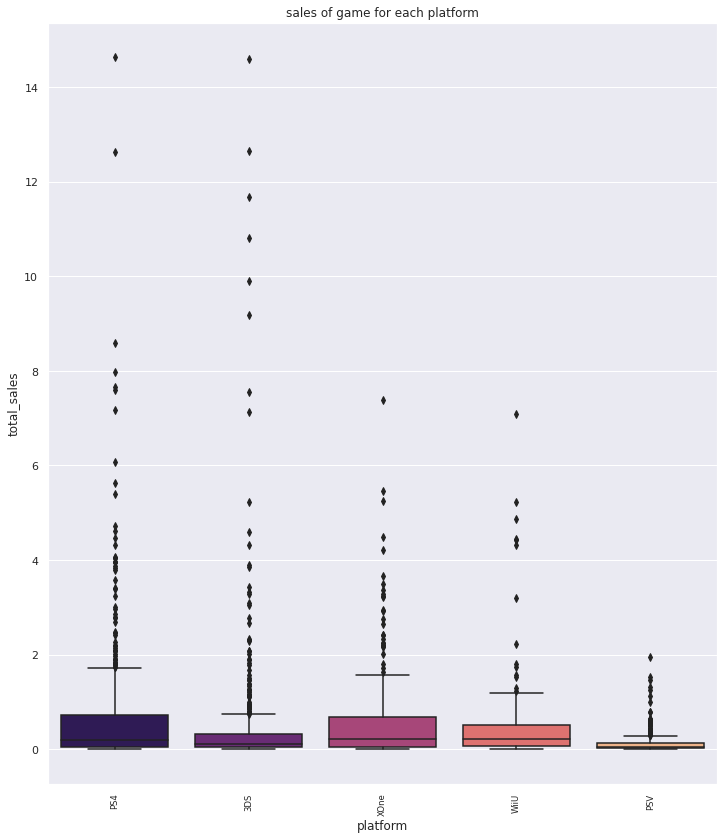

In [58]:
ax = plt.figure(figsize=(12,14))
ax = sns.boxplot(x="platform", y="total_sales", data=games5, palette='magma')
plt.title("sales of game for each platform")
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

As we can see there is a significant amount of outliers games in each platform. Which percent of the revenues these outliers produce?

In [59]:
# Take 2 million dollars as the limit that define outliers

print(games5[games5['total_sales'] > 2]['total_sales'].sum() / games5['total_sales'].sum())
print(len(games5[games5['total_sales'] > 2])/len(games5))

0.5142853853946034
0.0587557603686636


Wow, while being only 5.8% of the games, these outliers produce more than 50% of the revenues! The meaning of that is that out of 20 games, 1 of them produce half of the revenues, equals to the revenues of all of the other games. 

What about the averege sales per platform? We can calculate it

In [60]:
games5.groupby('platform')['total_sales'].mean()

platform
3DS     0.498077
PS4     0.801378
PSV     0.125744
WiiU    0.559116
XOne    0.645020
Name: total_sales, dtype: float64

As expected, The average is very low. In my opinion, the conclusion is that managers need to invest in specific games that have potential to make revenues, and not in platforms as a whole.

## Scoring Analysis

Another thing that we have to check is the relation between scoring and sales. I will analyze scoring in the most popular platform that still relevant in 2016 - PS4

In [61]:
ps4 = games5[games5['platform'] == 'PS4']

In [62]:
len(ps4)

392

In [63]:
ps4.isnull().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       140
user_score         135
rating               0
total_sales          0
dtype: int64

I need to drop the nulls for now since what I want to check is correlation between scoring and sales. Then I will draw the graphs then draw some conclusions.

In [64]:
ps4 = ps4.dropna(how='any')

In [65]:
ps4 = ps4[['name', 'user_score', 'critic_score', 'total_sales']]

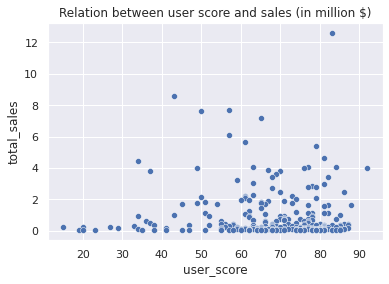

In [66]:
sns.scatterplot(data=ps4, x="user_score", y="total_sales")
plt.title('Relation between user score and sales (in million $)')
plt.show()

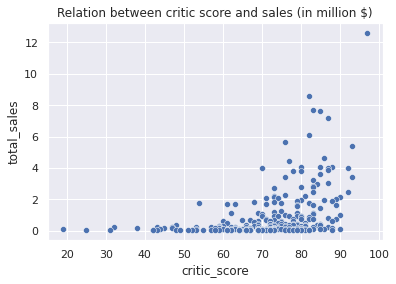

In [67]:
sns.scatterplot(data=ps4, x="critic_score", y="total_sales")
plt.title('Relation between critic score and sales (in million $)')
plt.show()

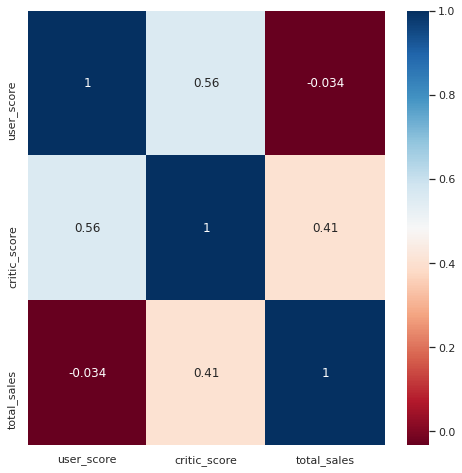

In [68]:
corr = ps4.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

Well, so from the graphs and metrix above we get an ambivalent picture. 

In ragard with user scoring there is no positive correlation between score and sales. But it is true that the game that sold the most, get very high score in user scoring. And, On the other hand, games that get very poor score, pay back almost anything in terms of revenues. 

In regard with critic score, here we find positive correlation with salas (even if not very strong), and from the scatter plot its clear that only when scoring get higher so do sales.  

To conclude, It seems that high scoring is not sufficiant condition to predict success in sales, but it is neccessary condition (in almost all of the cases, and especially in ragard with critic score)

## Games played on some platforms

In the beginning we see that there is some games that could be played in more than 1 platform. How do sales change in different platforms for the same game. 

In [69]:
games['name'].value_counts()

Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Madden NFL 07                   9
                               ..
Herdy Gerdy                     1
Pet Pals: New Leash on Life     1
Policenauts                     1
Psycho-Pass                     1
Monster Trucks                  1
Name: name, Length: 11559, dtype: int64

In [70]:
# This code extract the top 7 games that in use is several platforms
games7 = []

for i in games['name'].value_counts().index:
  games7.append(i)

games7 = games7[0:7]
games7

['Need for Speed: Most Wanted',
 'Ratatouille',
 'LEGO Marvel Super Heroes',
 'FIFA 14',
 'Madden NFL 07',
 'Madden NFL 08',
 'Cars']

In [71]:
colors = ["#ffa500", "#8c510a", "#ffc0cb", "#80cdc1", "#35978f", "#ff00ff", "#00ff00", 
          "#ffff00", "#add8e6", "#00ffff", "#800000", "#ff0000"]

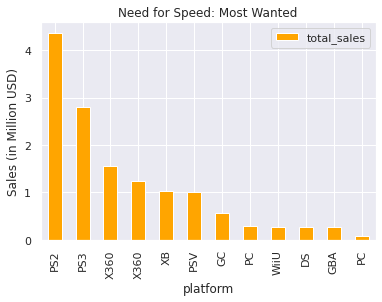

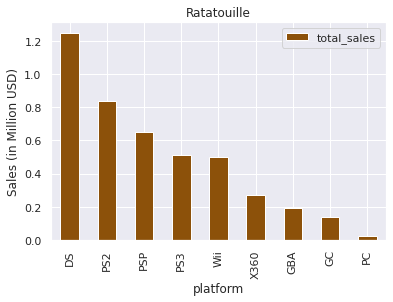

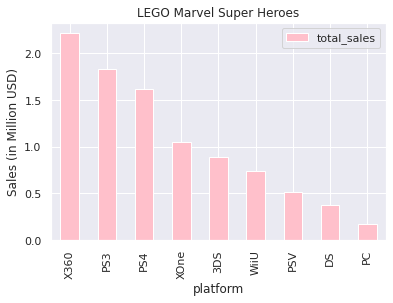

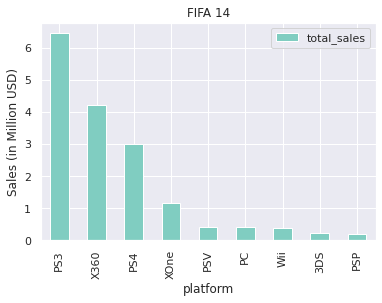

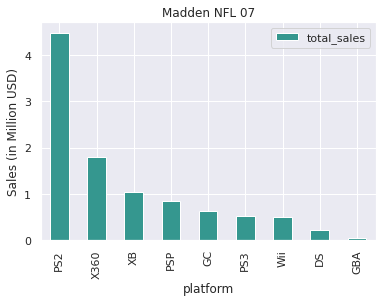

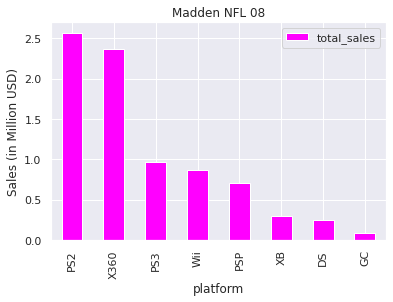

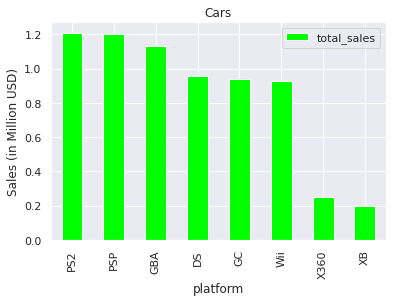

In [72]:
# loop through games7 and colors and print graphs of sales for each of the games

for i in range(len(games7)):
  df = games.query('name == @games7[@i]')
  df.plot(kind='bar',x='platform', y='total_sales', title=games7[i], color=colors[i])
  plt.ylabel('Sales (in Million USD)')
  print()
  print()
  plt.show()

What we can learn from those graphs is that the kind of platform IS very significant in determine how money would get in revenues, since we can see that the same game itself make very different results as the platform chaneged.

## Genre

Last parameter to check is genre. Is there genres that brings more revenues that others? First I will check the sum.

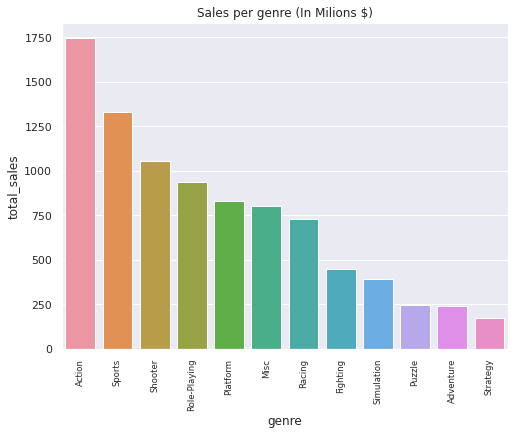

In [73]:
# descending order
order = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index

# Draw bar plot
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="genre",
                 y='total_sales',
                 data=games,
                 estimator=sum,
                 order=order,
                 ci=None)
plt.title('Sales per genre (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

It seems that Action yields the highest rate of revenues. But we have to check how many games there is in each genre catgory, and then plot graph of the mean of each genre.

In [74]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

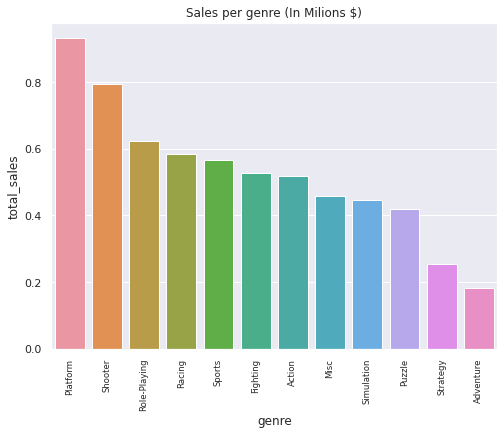

In [75]:
# descending order of the mean
order = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False).index

# Draw bar plot
ax = plt.figure(figsize=(8,6))
ax = sns.barplot(x="genre",
                 y='total_sales',
                 data=games,
                 order=order,
                 ci=None)
plt.title('Sales per genre (In Milions $)')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=8.5)
plt.show()

Well, so in Action there is the highest amount of games, so in average the revenues from Action games in somwhere in the middle. 

# User profile for each region

Now is time to check sales in different areas. We have 3 different regions: North America, Europe and japan. I will start by creating a pivot table and clculate the sales for each platform and genre in each of the regions.

In [76]:
regions = games.pivot_table(index='platform', 
                            values = ['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc = 'sum')

In [77]:
regions = regions.reset_index()
regions

,platform,eu_sales,jp_sales,na_sales
0,2600,5.47,0.00,90.60
1,3DO,0.00,0.10,0.00
2,3DS,61.48,100.67,83.49
3,DC,1.69,8.56,5.43
4,DS,188.89,175.57,382.40
5,GB,47.82,85.12,114.32
6,GBA,75.25,47.33,187.54
7,GC,38.71,21.58,133.46
8,GEN,5.52,2.67,19.27
9,GG,0.00,0.04,0.00


Now I will draw some graphs of the 5 top platforms in each of the regions. 

In [78]:
regions.columns

Index(['platform', 'eu_sales', 'jp_sales', 'na_sales'], dtype='object')

In [79]:
palettes = ["PRGn", "BrBG", "RdGy"]

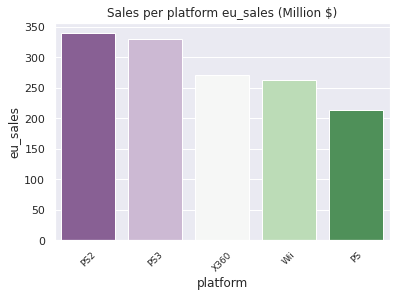

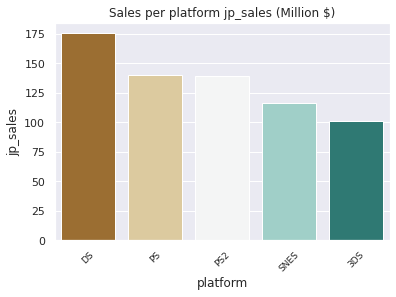

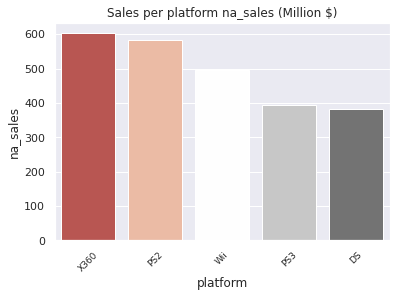

In [80]:
# iterate over the columns and draw plots of the top 5 platforms in each

for i in range(1,len(regions.columns)):
  data = regions.sort_values(regions.columns[i], ascending=False).head()
  ax = sns.barplot(x='platform', y=regions.columns[i], data=data, palette=palettes[i-1])
  plt.title('Sales per platform ' + regions.columns[i] + ' (Million $)')
  plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)
  print()
  print()
  plt.show()

X360 and Wii sales very good in NA and EU but not so in JP.  PS/PS2/PS3 sales very good in all of the regions, and so DS as well. On the other hand, the SENS3 and DS3 sales very good in JP but not so in EU and NA. Well, this is absolutly make sense: SENS3 and DS3 are Nintendo products, which is japanease company that do not very prevalent globaly. X360 is Microsoft's product and probably therfore do not very prevalent at Japan. 

Now is the turn of genre to be analyzed by different regions. 

In [81]:
regions_g = games.pivot_table(index='genre', 
                            values = ['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc = 'sum')

regions_g = regions_g.reset_index()

In [82]:
regions_g

,genre,eu_sales,jp_sales,na_sales
0,Action,519.13,161.43,879.01
1,Adventure,63.54,52.30,105.26
2,Fighting,100.33,87.48,223.36
3,Misc,212.74,108.11,407.27
4,Platform,200.35,130.83,445.50
5,Puzzle,50.01,57.31,122.87
6,Racing,236.51,56.71,359.35
7,Role-Playing,188.71,355.41,330.81
8,Shooter,317.34,38.76,592.24
9,Simulation,113.52,63.80,181.92


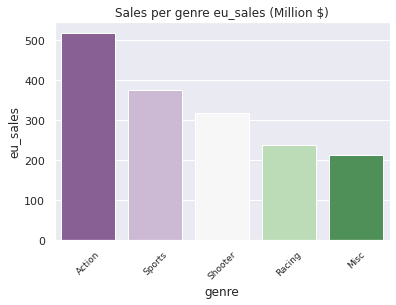

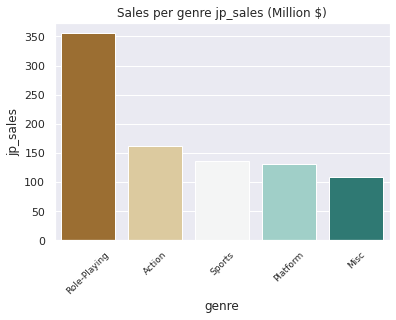

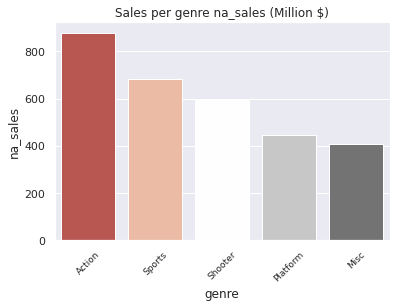

In [83]:
for i in range(1,len(regions_g.columns)):
  data = regions_g.sort_values(regions_g.columns[i], ascending=False).head()
  ax = sns.barplot(x='genre', y=regions_g.columns[i], data=data, palette=palettes[i-1])
  plt.title('Sales per genre ' + regions_g.columns[i] + ' (Million $)')
  plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)
  print()
  print()
  plt.show()

Action and sport is popular in all of the region, But in Japan the most popular is Role-Playing games Which is part of the Japanease culture and tradition. In europe, racing games are among the most popular ones, which is also make sense, since car racing is very europian sport.

Last thing to check is how rating afect sales in each region.

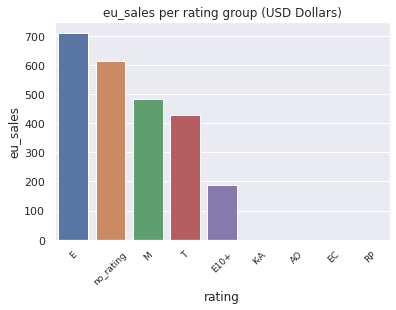

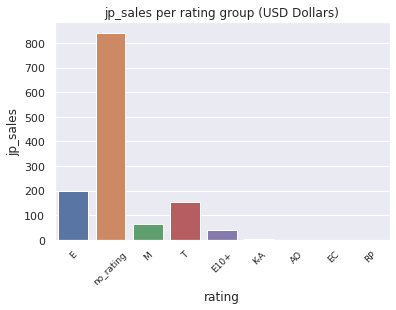

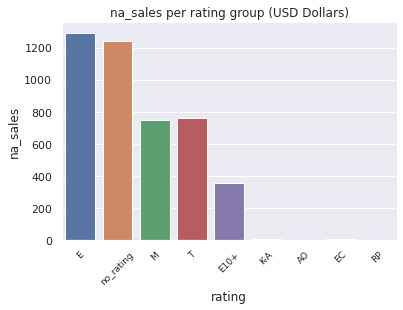

In [84]:
for i in range(1,len(regions.columns)):
  ax = sns.barplot(x='rating',
              y=regions.columns[i],
              data=games,
              estimator=sum,
              ci=None)
  plt.title(regions.columns[i] + ' per rating group (USD Dollars)')
  plt.setp(ax.get_xticklabels(), rotation=45, fontsize=9)
  print()
  print()
  plt.show()

One important thing to note is the different in the relation of adults/teen games. while in japan most of the players are kids, which is absolutly reasonable since the population is very young on average, in europe there is more sales of adults games than of teen games! In NA the sales of adults vs. teen games are equal.

## Conclusion: User profile

In japan the most preferable platforms are those of Japenease companies such as Ninetdo's DS3 and SENS. The most common genre is role-playing games, and the users are very young in average.

In europe, the most preferable platforms are PSs X360 and Wii. Among the most preferable genres is Racing and the sales of adults games is higher than teens games.

In North Americe DS is among the most prevalent platforms and Adults vs Teens games are equaly sold.

# Testing Hypothesis

Null Hypotheses: Average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypotheses: Average user ratings of the Xbox One and PC platforms are different.

In formulating the hypotheses, the null hypotheses is alawayes the hypotheses that say that the 2 means are the same, and this the assumption we examine. If p-value is less that 5 percent we reject this assumprion and conclude that the different in the means is statisticaly significance. I choose the limit of 0.05 since this is standard limit to use it t-test. 

In [85]:
xone = games[games['platform'] == 'XOne']['user_score'].dropna()
pc = games[games['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xone, pc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.3896435533548407e-05
We reject the null hypothesis


In [86]:
display(xone.mean())
display(pc.mean())

65.21428571428571

70.62467532467532

We can conclude that: Average user ratings of the Xbox One and PC platforms are different. From calculate the mean we know that pc rating average is higher.

Null Hypotheses: Average user ratings for the Action and Sports genres are the same

Alternative Hypotheses: Average user ratings for the Action and Sports genres are different.

In [87]:
sports = games[games['genre'] == 'Sports']['user_score'].dropna()
action = games[games['genre'] == 'Action']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(sports, action)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.10406951359050075
We can't reject the null hypothesis


In [88]:
display(sports.mean())
display(action.mean())

69.61196736174071

70.54043715846994

We can't reject the null hypothesis, so we have to stay with the assumption that: Average user ratings for the Action and Sports genres are the same.

# General Conclusion

In this project I examine the parameters that affect the revenues different video-game yield.

Several important insights raise from the analysis above. First thing to note is that platform's life-long is around 10 years. After 10 years, most of the platforms would not be in use at all. Very important when we want to develop a game or to launch campaign.

In addition, in all of the platforms there is a huge variance between different games on the same platform and between same game played on different platforms. The conclusion is that we have to direct the campaign to specific game and not to a platform in general, but to remember that the platform is also very important. So we have to terget good game in popular and atractive platform.

In regerd with scoring, I find that good scoring (especially critic scoring but also user scoring) is neccessary condition for good sales, but is not sufficiant condition. There is games that get high scoring but its sales performance are very poor.

additional conclusion is that there are important differences between users from different regions: 
- in **japan** the most preferable platforms are those of Japenease companies such as Ninetdo's DS3 and SENS. The most common genre is role-playing games, and the users are very young in average.  
- In **europe**, the most preferable platforms are PSs X360 and Wii. Among the most preferable genres is Racing and the sales of adults games is higher than teens games.
- In **North Americe** DS is among the most prevalent platforms and Adults vs Teens games are equaly sold.

Last thing to note is that statistically speaking there is a difference between XOne and PC platforms in favour of PC in terms of average revenue per game. In regard with genres - there is no statistically significant difference between Action and sports games.